In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the democratic candidates csv file

In [211]:
Dem_df = pd.read_csv("../Data/dem_candidates.csv")

#Dem_df.head()

In [212]:
Dem_df = Dem_df[['Won Primary','Gender','Partisan Lean', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?' ]]

#Dem_df.count()

# Missing Values

In [213]:
# Remove

Dem_df = Dem_df.dropna(axis=0, subset=['Won Primary'])

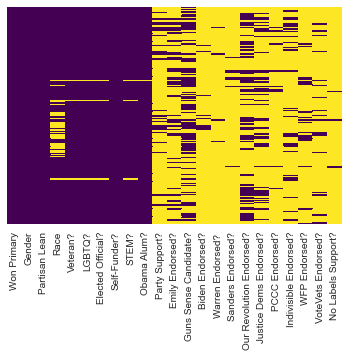

In [214]:
# Missing pattern in Risk Drivers

ax1 = sns.heatmap(Dem_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

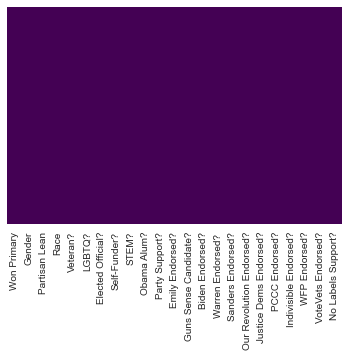

In [215]:
Dem_df2 = Dem_df.fillna('NaN')

ax2 = sns.heatmap(Dem_df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualize Risk Drivers

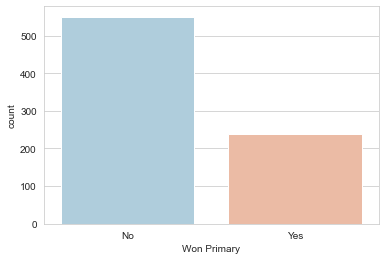

In [216]:
# Won:Loss count in the data

sns.set_style('whitegrid')

win_loss = sns.countplot(x='Won Primary',data=Dem_df2,palette='RdBu_r')

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

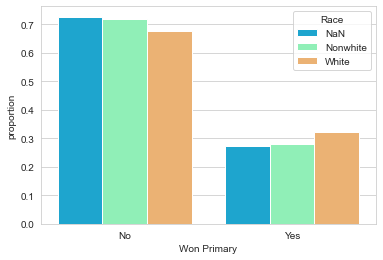

In [217]:
# Proprtion of Win:Loss based on Race

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "Race"
hue_order = ["White", "Nonwhite"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

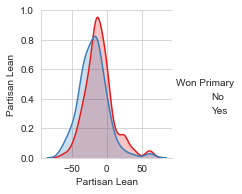

In [218]:
ax1 = sns.pairplot(Dem_df,hue = 'Won Primary',palette='Set1')

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

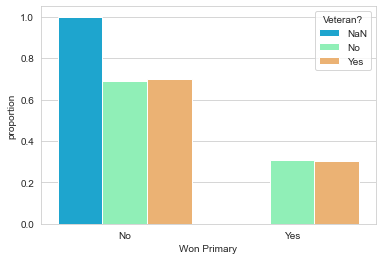

In [219]:
# Vetaran

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "Veteran?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

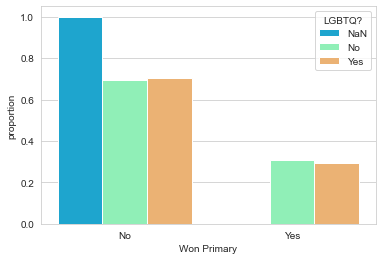

In [220]:
#LGBTQ

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "LGBTQ?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

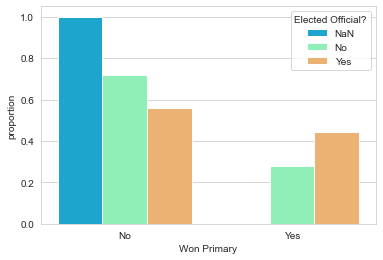

In [221]:
#Elected Official?

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "Elected Official?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

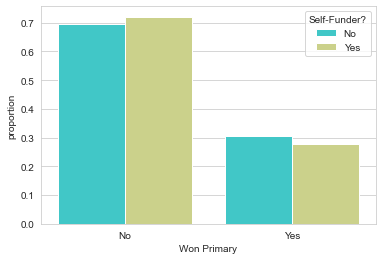

In [222]:
#Self-Funder?

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "Self-Funder?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

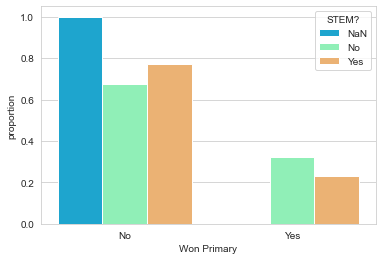

In [223]:
#STEM?

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "STEM?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

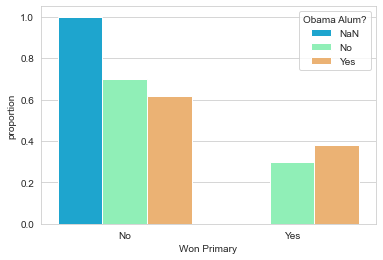

In [224]:
#Obama Alum?

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "Obama Alum?"
hue_order = ["Yes", "No", "NaN"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

<AxesSubplot:xlabel='Won Primary', ylabel='proportion'>

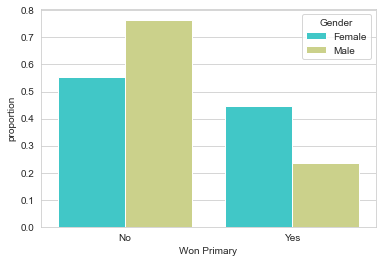

In [225]:
#Gender

df = Dem_df2
x, y, hue = "Won Primary", "proportion", "Gender"
hue_order = ["Male", "Female"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, palette='rainbow'))

In [263]:
Dem_df2['Gender'].value_counts()

Male      533
Female    256
Name: Gender, dtype: int64

            Won    Loss
Male        125    408      Female_win = 114/(114+142) = 45%    

Female      114     142     All_others_win = 125/(125+408) = 23%   

# Dummy variable coding

In [227]:
# Retain only relevant columns

Dem_df3 = Dem_df2[['Won Primary', 'Gender','Partisan Lean', 'Elected Official?', 'Obama Alum?', 'STEM?', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?']]

X_cat = pd.get_dummies(Dem_df3[['Gender','Elected Official?', 'Obama Alum?', 'STEM?', 'Race', 'Veteran?', 'LGBTQ?', 'Self-Funder?']], drop_first=True)

X_num = pd.DataFrame(Dem_df2['Partisan Lean'])

X = pd.concat([X_num, X_cat], axis = 1)

In [228]:
X.head()

Partisan Lean  Gender_Male  Elected Official?_No  Elected Official?_Yes  \
0     -28.879999            1                     1                      0   
1     -28.879999            1                     1                      0   
2     -28.879999            1                     1                      0   
3     -28.879999            1                     0                      1   
4     -28.879999            0                     0                      1   

   Obama Alum?_No  Obama Alum?_Yes  STEM?_No  STEM?_Yes  Race_Nonwhite  \
0               1                0         1          0              1   
1               1                0         1          0              0   
2               1                0         1          0              0   
3               1                0         1          0              1   
4               1                0         1          0              0   

   Race_White  Veteran?_No  Veteran?_Yes  LGBTQ?_No  LGBTQ?_Yes  \
0           0            0             1          1           0   
1           1            1             0          0           1   
2           1            0             1          1           0   
3           0            0             1          1           0   
4           1            1             0          1           0   

   Self-Funder?_Yes  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

# Train - Test Split

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
y = Dem_df3['Won Primary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [245]:
y_train.value_counts()

No     390
Yes    162
Name: Won Primary, dtype: int64

# Decision Tree

In [232]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=101)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [233]:
X.columns

Index(['Partisan Lean', 'Gender_Male', 'Elected Official?_No',
       'Elected Official?_Yes', 'Obama Alum?_No', 'Obama Alum?_Yes',
       'STEM?_No', 'STEM?_Yes', 'Race_Nonwhite', 'Race_White', 'Veteran?_No',
       'Veteran?_Yes', 'LGBTQ?_No', 'LGBTQ?_Yes', 'Self-Funder?_Yes'],
      dtype='object')

# Tree Visualization

In [246]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = ['Partisan Lean','Gender_Male','Elected Official?_No', 'Elected Official?_Yes',
       'Obama Alum?_No', 'Obama Alum?_Yes', 'STEM?_No', 'STEM?_Yes',
       'Race_Nonwhite', 'Race_White', 'Veteran?_No', 'Veteran?_Yes',
       'LGBTQ?_No', 'LGBTQ?_Yes', 'Self-Funder?_Yes']

#features

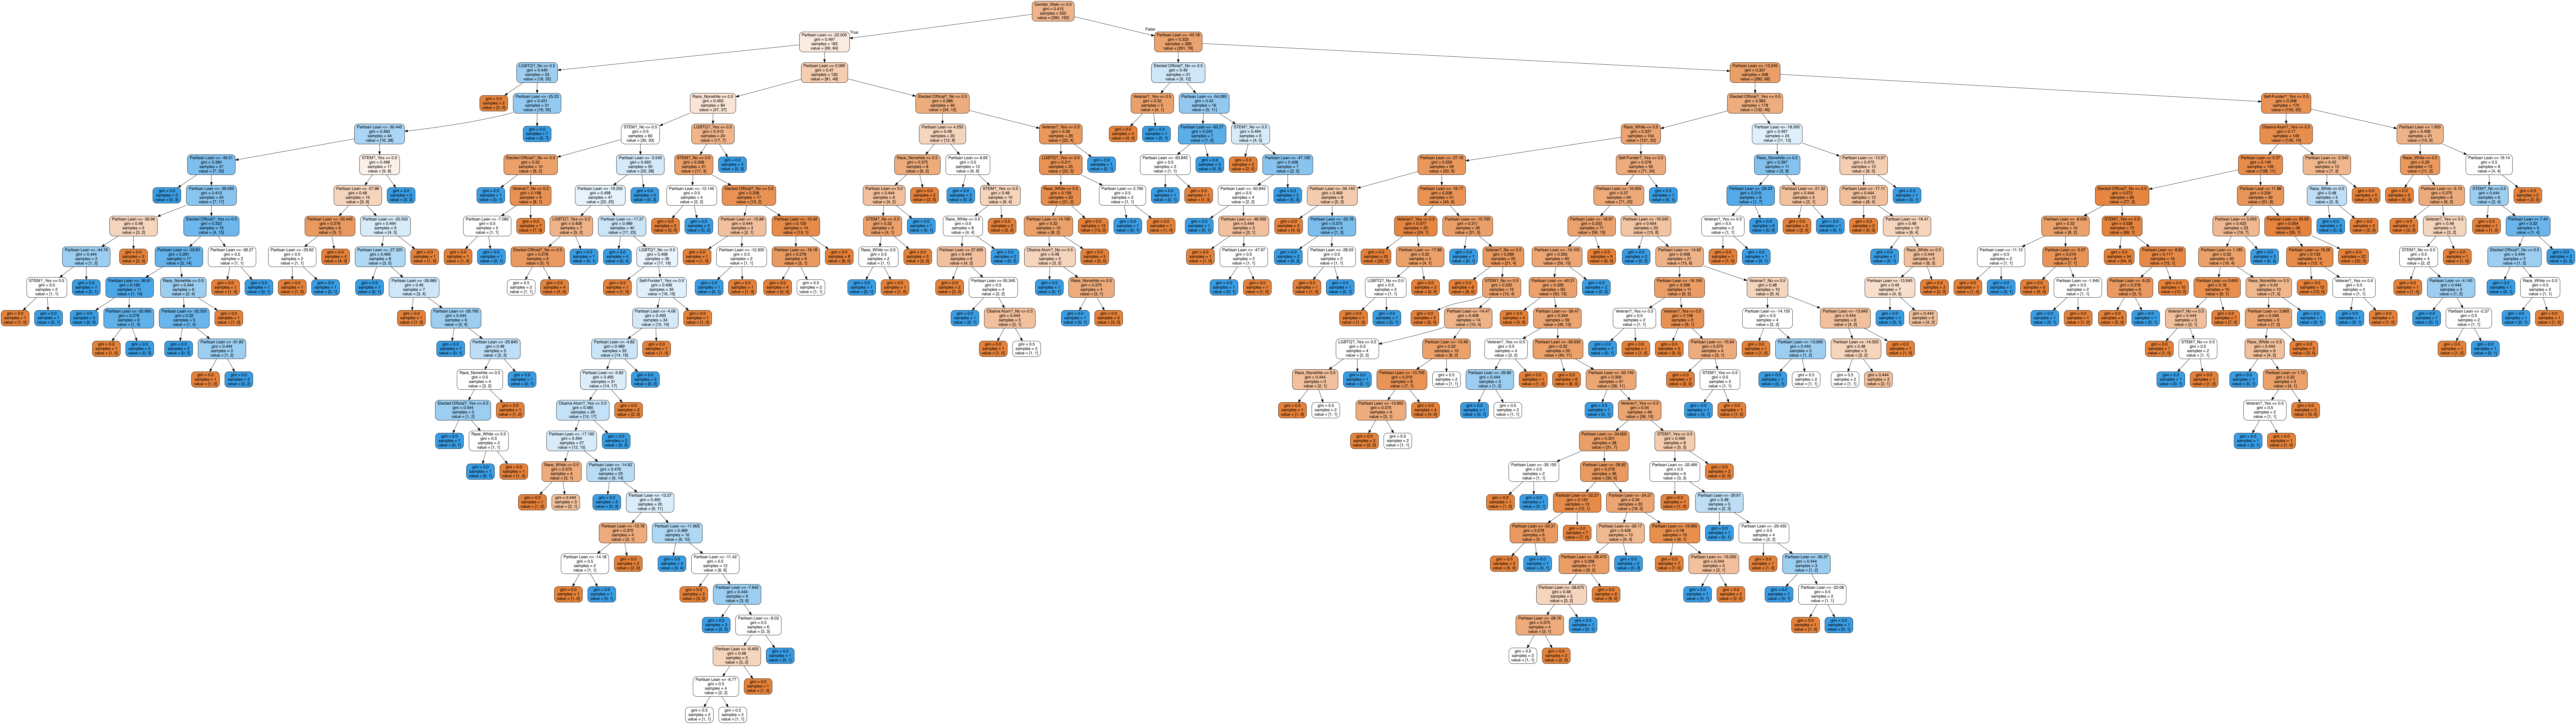

In [247]:
dot_data = StringIO()  

export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png()) 

# Prune Decision Tree using Grid Search

In [248]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 20)), 'max_depth': list(range(2,10)), 'min_samples_leaf' : [30], 'criterion':['gini','entropy']}

In [250]:
dtree2 = GridSearchCV(DecisionTreeClassifier(random_state=101), params, verbose=1, cv=3)

dtree2.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:    4.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [30], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

## Best Parameters from Grid Search

In [251]:
dtree2.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 30,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 101,
 'splitter': 'best'}

In [260]:
dtree3 = DecisionTreeClassifier(random_state=101, max_depth =  3,  criterion =  'gini')


dtree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

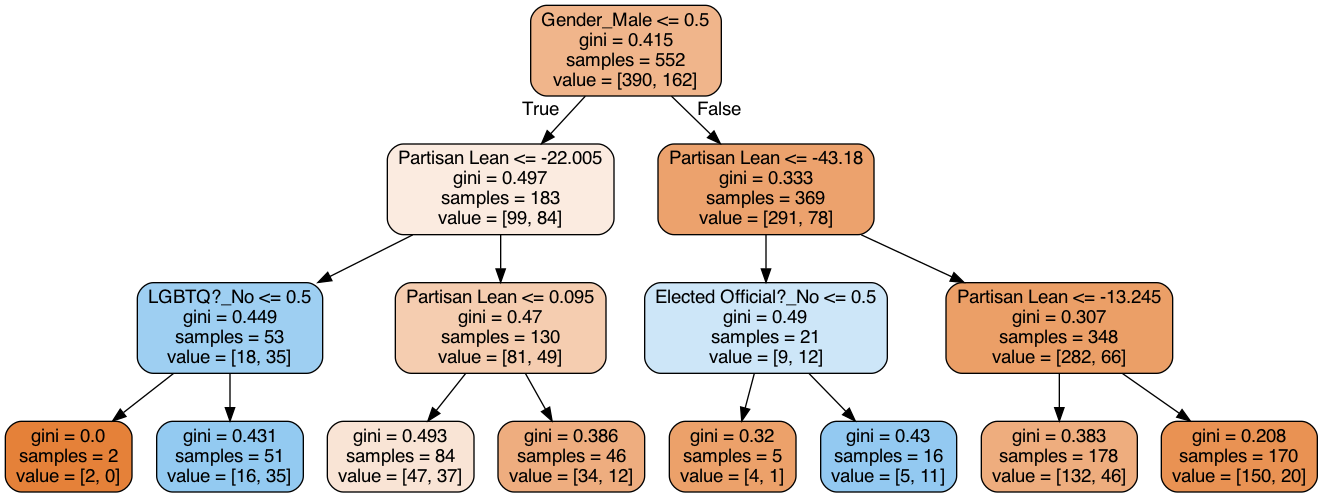

In [261]:
dot_data = StringIO()  

export_graphviz(dtree3, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph[0].create_png()) 

# Prediction and Evaluation 

In [262]:
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.70      0.76      0.73       160
         Yes       0.39      0.31      0.35        77

   micro avg       0.62      0.62      0.62       237
   macro avg       0.54      0.54      0.54       237
weighted avg       0.60      0.62      0.60       237



In [255]:
#tn, fp, fn, tp

print(confusion_matrix(y_test,predictions))

[[122  38]
 [ 53  24]]


In [267]:
y_test.value_counts()

No     160
Yes     77
Name: Won Primary, dtype: int64

# The model has 8% lift over random selection